In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [169]:
df = pd.read_csv('Ames Housing Data Encoding.csv')

In [170]:
df.head(10)

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin Type 1,Total Bsmt SF,Heating QC,1st Flr SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,6,1960,1960,112.0,2,3,4,1080.0,1,1656,...,0,0,0,0,1,0,0,0,1,0
1,5,1961,1961,0.0,2,3,3,882.0,2,896,...,0,0,0,0,1,0,0,0,1,0
2,6,1958,1958,108.0,2,3,5,1329.0,2,1329,...,0,0,0,0,1,0,0,0,1,0
3,7,1968,1968,0.0,3,3,5,2110.0,4,2110,...,0,0,0,0,1,0,0,0,1,0
4,5,1997,1998,0.0,2,4,6,928.0,3,928,...,0,0,0,0,1,0,0,0,1,0
5,6,1998,1998,20.0,2,3,6,926.0,4,926,...,0,0,0,0,1,0,0,0,1,0
6,8,2001,2001,0.0,3,4,6,1338.0,4,1338,...,0,0,0,0,1,0,0,0,1,0
7,8,1992,1992,0.0,3,4,5,1280.0,4,1280,...,0,0,0,0,1,0,0,0,1,0
8,8,1995,1996,0.0,3,4,6,1595.0,4,1616,...,0,0,0,0,1,0,0,0,1,0
9,7,1999,1999,0.0,2,3,1,994.0,3,1028,...,0,0,0,0,1,0,0,0,1,0


In [171]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
from sklearn.linear_model import ElasticNet

In [104]:
base_elastic_model = ElasticNet()

In [105]:
param_grid = {'alpha':[0.1,1,5,10,50,80,100],
              'l1_ratio':[.1, .5, .7, .8, .9, .95, .99, 1]}

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
grid_model = GridSearchCV

In [108]:
# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=2)

In [109]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   1.6s
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   1.5s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   1.2s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   1.3s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   1.3s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.8s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   1.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   1.3s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .

[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.9s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86204320874.67761, tolerance: 922283369.4773041
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   2.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96968654348.00037, tolerance: 909340689.5146695
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.7s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137565039830.3274, tolerance: 933931472.2837176
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.8s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110595273325.50977, tolerance: 928103702.827336
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.8s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169168080641.20712, tolerance: 925892939.480313
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.8s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105870850530.27258, tolerance: 934080761.5733281
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.9s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61426887163.88745, tolerance: 942001212.3429223
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.9s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102246176479.47516, tolerance: 952133270.3388276
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.9s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61485740953.12842, tolerance: 909454732.7807794
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.9s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89845090007.02887, tolerance: 931013593.0522491
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   1.8s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295840765641.3032, tolerance: 922283369.4773041
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.5s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246898245676.3692, tolerance: 909340689.5146695
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.5s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332299646794.0298, tolerance: 933931472.2837176
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310561276555.3817, tolerance: 928103702.827336
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.5s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325721006439.2894, tolerance: 925892939.480313
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310162573297.2707, tolerance: 934080761.5733281
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.4s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292113524879.18787, tolerance: 942001212.3429223
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.5s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312431656740.8506, tolerance: 952133270.3388276
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.4s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287460079191.3198, tolerance: 909454732.7807794
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.7s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297966244580.5891, tolerance: 931013593.0522491
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.4s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.1s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.2s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.1s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.2s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.1s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.2s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] .

[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.4s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.4s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.3s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.5s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.6s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.5s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.5s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] .

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49946953461.1485, tolerance: 922283369.4773041
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.5s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34824649258.334656, tolerance: 909340689.5146695
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.6s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96237654932.61029, tolerance: 933931472.2837176
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.4s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79131010254.26416, tolerance: 928103702.827336
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.5s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136335836291.60645, tolerance: 925892939.480313
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68068446331.45697, tolerance: 934080761.5733281
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.6s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26598129128.283936, tolerance: 942001212.3429223
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.6s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71735875432.33466, tolerance: 952133270.3388276
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   3.9s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14612438778.273438, tolerance: 909454732.7807794
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   3.6s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67352032938.56445, tolerance: 931013593.0522491
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.6s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] .

[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.3s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.2s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.2s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.3s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.3s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.3s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.3s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] .

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2009470525.2058105, tolerance: 909340689.5146695
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   1.6s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2607484271.749878, tolerance: 933931472.2837176
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   1.8s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.4s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.5s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.1s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1098661517.9124756, tolerance: 952133270.3388276
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   1.8s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.5s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] .

[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.2s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.1s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.2s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.1s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.2s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.2s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.2s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.1s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] .

[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.0s
[CV] alpha=80, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.1s
[CV] alpha=80, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.0s
[CV] alpha=80, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.1s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] .

[CV] ............................. alpha=80, l1_ratio=1, total=   0.2s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.2s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.2s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.2s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.2s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.3s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .

[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.1s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.1s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.1s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  3.1min finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 80, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [110]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1)

In [111]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [112]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.161966,0.270221,0.0066,0.012824,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-5.781079e+08,-6.687597e+08,-4.825199e+08,-5.669059e+08,-6.395692e+08,-5.105912e+08,-4.401416e+08,-4.791420e+08,-4.624160e+08,-6.334997e+08,-5.461653e+08,7.803512e+07,9
1,0.543531,0.077866,0.0019,0.000700,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-5.651532e+08,-6.591485e+08,-4.653111e+08,-5.663051e+08,-6.507863e+08,-5.078221e+08,-4.395028e+08,-4.840029e+08,-4.560577e+08,-6.397850e+08,-5.433875e+08,8.033208e+07,5
2,0.550131,0.238544,0.0026,0.000917,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-5.575958e+08,-6.561687e+08,-4.553949e+08,-5.658819e+08,-6.625242e+08,-5.075003e+08,-4.393335e+08,-4.897290e+08,-4.557001e+08,-6.455924e+08,-5.435421e+08,8.276035e+07,6
3,0.601934,0.134317,0.0027,0.001616,0.1,0.8,"{'alpha': 0.1, 'l1_ratio': 0.8}",-5.532512e+08,-6.557892e+08,-4.501720e+08,-5.653358e+08,-6.719584e+08,-5.077857e+08,-4.392517e+08,-4.945355e+08,-4.575818e+08,-6.497729e+08,-5.445434e+08,8.461570e+07,7
4,0.747643,0.058517,0.0023,0.001005,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-5.482962e+08,-6.570846e+08,-4.452747e+08,-5.640861e+08,-6.865512e+08,-5.086428e+08,-4.392174e+08,-5.019934e+08,-4.629519e+08,-6.559228e+08,-5.470021e+08,8.733672e+07,12
5,1.074261,0.111183,0.0026,0.000917,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-5.455136e+08,-6.593289e+08,-4.437681e+08,-5.627120e+08,-6.979091e+08,-5.095304e+08,-4.392826e+08,-5.074040e+08,-4.685696e+08,-6.609080e+08,-5.494926e+08,8.940710e+07,14
6,1.837005,0.080091,0.0020,0.000632,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-5.430665e+08,-6.662391e+08,-4.468396e+08,-5.603855e+08,-7.127653e+08,-5.110328e+08,-4.390766e+08,-5.128473e+08,-4.762627e+08,-6.678773e+08,-5.536393e+08,9.230637e+07,16
7,1.455883,0.107553,0.0027,0.001188,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-5.424340e+08,-6.752252e+08,-4.550325e+08,-5.595827e+08,-7.202231e+08,-5.124626e+08,-4.385043e+08,-5.145641e+08,-4.790346e+08,-6.712434e+08,-5.568306e+08,9.390988e+07,19
8,0.147208,0.019819,0.0021,0.000943,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-7.679951e+08,-8.795740e+08,-6.512074e+08,-6.442714e+08,-7.222806e+08,-6.445314e+08,-5.115846e+08,-5.208320e+08,-6.470803e+08,-7.273863e+08,-6.716743e+08,1.044310e+08,28
9,0.176810,0.015238,0.0022,0.000748,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-6.838530e+08,-7.838426e+08,-5.846142e+08,-5.993872e+08,-6.658739e+08,-5.768000e+08,-4.708075e+08,-4.946712e+08,-5.585298e+08,-6.676050e+08,-6.085984e+08,8.903924e+07,23


In [113]:
y_pred = grid_model.predict(X_test)

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [116]:
MAE

16382.046710801176

In [117]:
RMSE

22819.93732490567

In [118]:
100*RMSE/df['SalePrice'].mean()

12.87177000471616

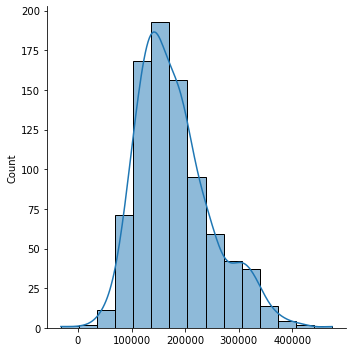

In [119]:
sns.displot(y_pred,bins=15,kde=True)

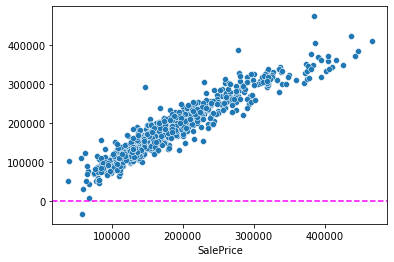

In [120]:
sns.scatterplot(x=y_test,y=y_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

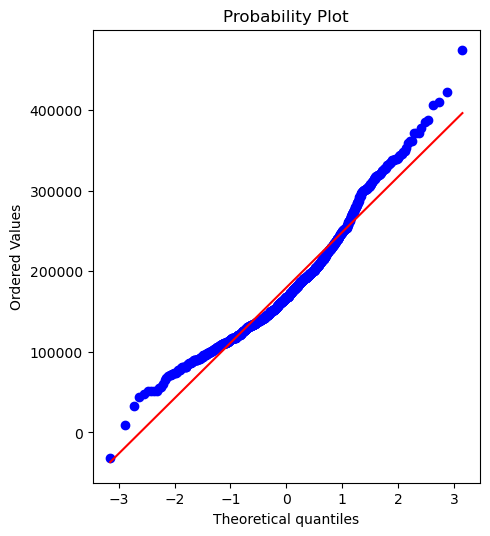

In [121]:
fig,ax = plt.subplots(figsize=(5,6),dpi=100)

_=sp.stats.probplot(y_pred,plot=ax)

In [147]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.6s
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.6s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.6s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.6s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.9s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.8s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.5s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   1.3s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .

[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   1.1s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86204320874.67761, tolerance: 922283369.4773041
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   3.6s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96968654348.00037, tolerance: 909340689.5146695
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   2.1s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137565039830.3274, tolerance: 933931472.2837176
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   2.2s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110595273325.50977, tolerance: 928103702.827336
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   2.5s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169168080641.20712, tolerance: 925892939.480313
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   2.5s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105870850530.27258, tolerance: 934080761.5733281
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   2.8s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61426887163.88745, tolerance: 942001212.3429223
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   3.2s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102246176479.47516, tolerance: 952133270.3388276
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   3.1s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61485740953.12842, tolerance: 909454732.7807794
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   2.3s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89845090007.02887, tolerance: 931013593.0522491
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   2.1s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295840765641.3032, tolerance: 922283369.4773041
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.6s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246898245676.3692, tolerance: 909340689.5146695
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.7s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332299646794.0298, tolerance: 933931472.2837176
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.4s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310561276555.3817, tolerance: 928103702.827336
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.6s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325721006439.2894, tolerance: 925892939.480313
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310162573297.2707, tolerance: 934080761.5733281
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.5s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292113524879.18787, tolerance: 942001212.3429223
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.7s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312431656740.8506, tolerance: 952133270.3388276
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.5s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287460079191.3198, tolerance: 909454732.7807794
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.8s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297966244580.5891, tolerance: 931013593.0522491
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   1.5s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.1s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.3s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.1s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.2s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.1s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.2s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] .

[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.4s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.8s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.5s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.8s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.8s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.9s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   1.1s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] .

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49946953461.1485, tolerance: 922283369.4773041
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   2.8s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34824649258.334656, tolerance: 909340689.5146695
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   3.1s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96237654932.61029, tolerance: 933931472.2837176
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   2.0s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79131010254.26416, tolerance: 928103702.827336
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   2.1s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136335836291.60645, tolerance: 925892939.480313
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   1.6s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68068446331.45697, tolerance: 934080761.5733281
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   2.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26598129128.283936, tolerance: 942001212.3429223
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   3.6s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71735875432.33466, tolerance: 952133270.3388276
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   5.5s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14612438778.273438, tolerance: 909454732.7807794
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   4.4s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67352032938.56445, tolerance: 931013593.0522491
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   3.3s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.5s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.1s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.2s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.3s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] .

[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.3s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.2s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.3s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.5s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.3s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.3s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.3s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] .

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2009470525.2058105, tolerance: 909340689.5146695
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   2.7s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2607484271.749878, tolerance: 933931472.2837176
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   2.8s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.7s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.7s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.9s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.4s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1098661517.9124756, tolerance: 952133270.3388276
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   1.9s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.6s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   1.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.1s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.1s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] .

[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.0s
[CV] alpha=80, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.1s
[CV] alpha=80, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.2s
[CV] alpha=80, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.1s
[CV] alpha=80, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.5, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.1s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.5s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] .

[CV] ............................. alpha=80, l1_ratio=1, total=   0.2s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.3s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.4s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.3s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.3s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.3s
[CV] alpha=80, l1_ratio=1 ............................................
[CV] ............................. alpha=80, l1_ratio=1, total=   0.3s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .

[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.1s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.1s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.1s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.1s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.1s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.1s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  4.6min finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 80, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

**Lasso CV**

In [172]:
from sklearn.linear_model import LassoCV

In [173]:
model = LassoCV()

In [174]:
model.fit(X_train, y_train)

LassoCV()

In [175]:
model.alpha_

234.33086247796874

In [176]:
y_pred = model.predict(X_test)

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [178]:
mean_squared_error(y_test,y_pred)

513185081.5785954

In [179]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [180]:
100*RMSE/df['SalePrice'].mean()

12.777939726292054

In [181]:
test_pred = y_test - y_pred

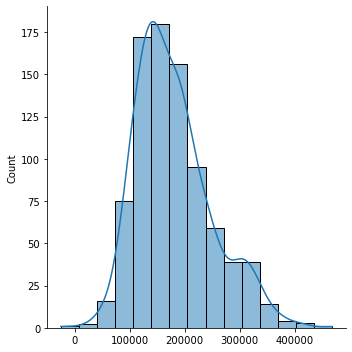

In [182]:
sns.displot(y_pred,bins=15,kde=True)

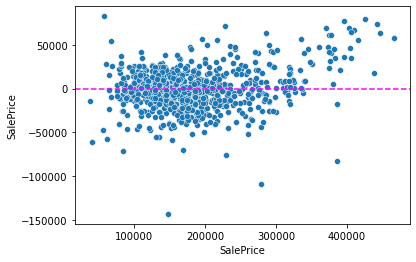

In [183]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

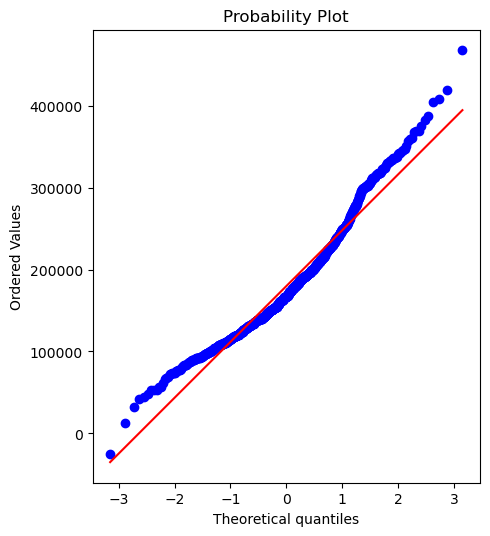

In [184]:
fig,ax = plt.subplots(figsize=(5,6),dpi=100)

_=sp.stats.probplot(y_pred,plot=ax)

**Feature selection by using Lasso CV**

In [188]:
model.fit(X, y)

LassoCV()

In [189]:
y_pred = model.predict(X)

In [190]:
model.coef_

array([  0.        , 408.62940557, 528.19897143,  42.02312155,
         0.        ,   0.        ,   0.        ,  40.19031617,
         0.        ,   8.24143443,  60.98793764,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,  60.03070063,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.  

In [191]:
x = model.coef_

In [192]:
np.where(x>0)

(array([ 1,  2,  3,  7,  9, 10, 19], dtype=int64),)

In [193]:
df.columns[[ 1,  2,  3,  7,  9, 10, 19]]

Index(['Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Garage Area'],
      dtype='object')

In [194]:
df = df[['Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF','1st Flr SF', 'Gr Liv Area', 'Garage Area']]

In [195]:
df

,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,1960,1960,112.0,1080.0,1656,1656,528.0
1,1961,1961,0.0,882.0,896,896,730.0
2,1958,1958,108.0,1329.0,1329,1329,312.0
3,1968,1968,0.0,2110.0,2110,2110,522.0
4,1997,1998,0.0,928.0,928,1629,482.0
...,...,...,...,...,...,...,...
2846,1984,1984,0.0,1003.0,1003,1003,588.0
2847,1983,1983,0.0,864.0,902,902,484.0
2848,1992,1992,0.0,912.0,970,970,0.0
2849,1974,1975,0.0,1389.0,1389,1389,418.0
